# Predicting Diabetes Stage Using Diabetes Health Indicators Dataset


## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import set_config
set_config(transform_output="pandas")

# code for ignore all warnings
import warnings
warnings.filterwarnings('ignore')

## Function to Save Figures

In [2]:
# code to save the figures as high-res PNGs
import os
from pathlib import Path
from matplotlib import pyplot as plt

IMAGES_PATH = Path() / "Images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load Dataset

In [3]:
# diabetes_binary_5050split_health_indicators_BRFSS2015
# Read csv and load into a dataframe
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

## Exploratory Data Analysis (EDA)

### Detailed Info

In [4]:
# See dataset detailed info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

### Summary Statistics

In [5]:
# See the dataset statistical summary
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Handle Duplicates

In [6]:
#Check the shape of the dataframe
print('Shape of the dataset:',df.shape)

#Check for duplicate rows
dup = df[df.duplicated()]
print('Number of duplicate rows:',dup.shape[0])

#Drop duplicates rows
df = df.drop_duplicates()
print('Shape after dropping duplicates:',df.shape)

Shape of the dataset: (70692, 22)
Number of duplicate rows: 1635
Shape after dropping duplicates: (69057, 22)


In [7]:
# See first 5 rows
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [8]:
# See last 5 rows
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
70691,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [9]:
#Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69057 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       69057 non-null  float64
 1   HighBP                69057 non-null  float64
 2   HighChol              69057 non-null  float64
 3   CholCheck             69057 non-null  float64
 4   BMI                   69057 non-null  float64
 5   Smoker                69057 non-null  float64
 6   Stroke                69057 non-null  float64
 7   HeartDiseaseorAttack  69057 non-null  float64
 8   PhysActivity          69057 non-null  float64
 9   Fruits                69057 non-null  float64
 10  Veggies               69057 non-null  float64
 11  HvyAlcoholConsump     69057 non-null  float64
 12  AnyHealthcare         69057 non-null  float64
 13  NoDocbcCost           69057 non-null  float64
 14  GenHlth               69057 non-null  float64
 15  MentHlth           

### Handle Missing Values

In [10]:
# Check for missing values
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### Feature Data types

In [11]:
# Check all the data types for each feature
df.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

### Value Counts

In [12]:
# The value_counts() function returns a Series that contain counts of unique values.
df['Diabetes_binary'].value_counts()

1.0    35097
0.0    33960
Name: Diabetes_binary, dtype: int64

In [13]:
df['HighBP'].value_counts()

1.0    39447
0.0    29610
Name: HighBP, dtype: int64

In [14]:
df['Smoker'].value_counts()

0.0    35776
1.0    33281
Name: Smoker, dtype: int64

In [15]:
df['Stroke'].value_counts()

0.0    64662
1.0     4395
Name: Stroke, dtype: int64

In [16]:
df['HeartDiseaseorAttack'].value_counts()

0.0    58638
1.0    10419
Name: HeartDiseaseorAttack, dtype: int64

In [17]:
df['Sex'].value_counts()

0.0    37535
1.0    31522
Name: Sex, dtype: int64

In [18]:
df['Education'].value_counts()

6.0    24646
5.0    19845
4.0    19397
3.0     3447
2.0     1647
1.0       75
Name: Education, dtype: int64

In [19]:
df['Income'].value_counts()

8.0    19307
7.0    11274
6.0    10195
5.0     7975
4.0     6646
3.0     5552
2.0     4497
1.0     3611
Name: Income, dtype: int64

In [20]:
# Check unique values per column
for col in df.columns:
    unique_vals = df[col].unique()
    if(len(unique_vals) <= 10):
        print('Column',col,'has', len(unique_vals), 'unique values -->', unique_vals)
    else:
        print('Column', col,'has',len(unique_vals),'unique values')

Column Diabetes_binary has 2 unique values --> [0. 1.]
Column HighBP has 2 unique values --> [1. 0.]
Column HighChol has 2 unique values --> [0. 1.]
Column CholCheck has 2 unique values --> [1. 0.]
Column BMI has 80 unique values
Column Smoker has 2 unique values --> [0. 1.]
Column Stroke has 2 unique values --> [0. 1.]
Column HeartDiseaseorAttack has 2 unique values --> [0. 1.]
Column PhysActivity has 2 unique values --> [1. 0.]
Column Fruits has 2 unique values --> [0. 1.]
Column Veggies has 2 unique values --> [1. 0.]
Column HvyAlcoholConsump has 2 unique values --> [0. 1.]
Column AnyHealthcare has 2 unique values --> [1. 0.]
Column NoDocbcCost has 2 unique values --> [0. 1.]
Column GenHlth has 5 unique values --> [3. 1. 2. 4. 5.]
Column MentHlth has 31 unique values
Column PhysHlth has 31 unique values
Column DiffWalk has 2 unique values --> [0. 1.]
Column Sex has 2 unique values --> [1. 0.]
Column Age has 13 unique values
Column Education has 6 unique values --> [6. 5. 4. 3. 2. 1.

### Data Visualization

#### Target Variable Count

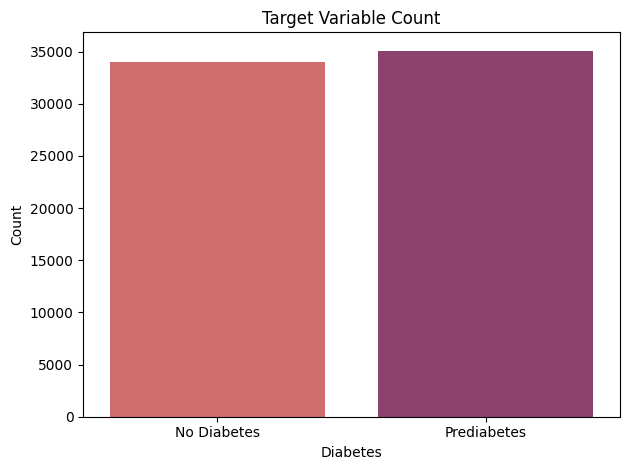

In [21]:
# Create a countplot
sns.countplot(x=df['Diabetes_binary'], palette="flare")

# Set plot labels
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.title("Target Variable Count")
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])

# Save the figure
save_fig('Target variable countplot')
# Show the plot
plt.show()

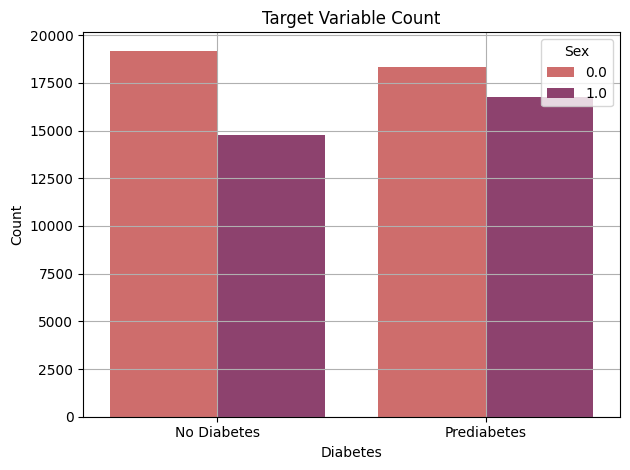

In [22]:
# 0 = no diabetes 1 = prediabetes
# 0 = female 1 = male

# Create a countplot
sns.countplot(data=df, x='Diabetes_binary', hue='Sex', palette="flare")

# Set plot labels
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.title("Target Variable Count")
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])
plt.grid()

# Save the figure
save_fig('Target variable countplot_Hue_grid')
# Show the plot
plt.show()

#### Relationship Between Diabetes and Stroke

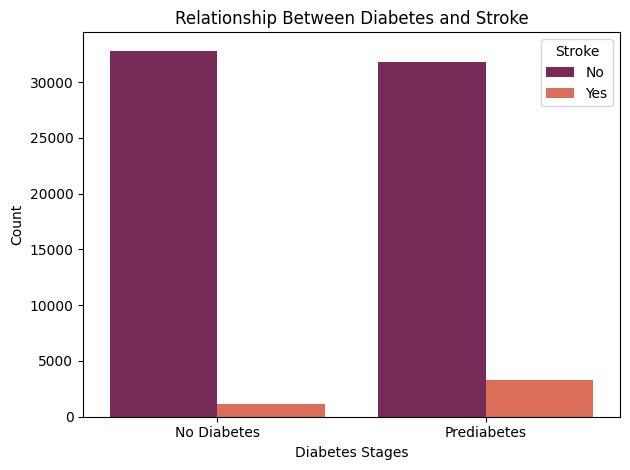

In [23]:
# Create a countplot
sns.countplot(data=df, x="Diabetes_binary", hue="Stroke", palette="rocket")
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("Count")
plt.title("Relationship Between Diabetes and Stroke")
plt.legend(title="Stroke", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])
# Save the figure
save_fig("Diabetes and Stroke")
# Show the plot
plt.show()

#### Relationship Between Diabetes and HighBP

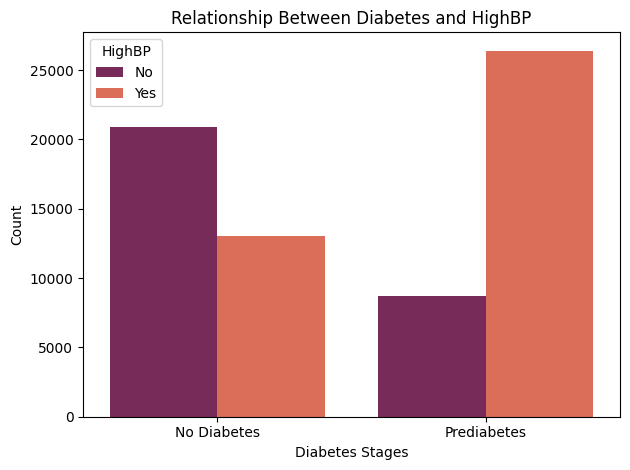

In [24]:
# Create a countplot
sns.countplot(data=df, x="Diabetes_binary", hue="HighBP", palette="rocket")
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("Count")
plt.title("Relationship Between Diabetes and HighBP")
plt.legend(title="HighBP", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])

# Save the figure
save_fig("Diabetes and HighBP")
# Show the plot
plt.show()

#### Relationship Between Diabetes and HighChol

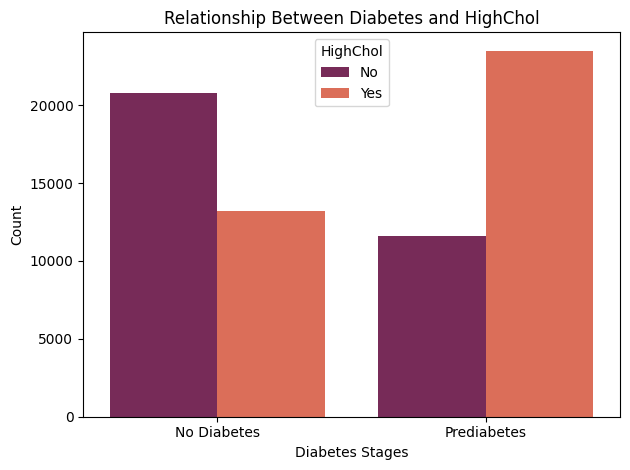

In [25]:
# Create a countplot
sns.countplot(data=df, x="Diabetes_binary", hue="HighChol", palette="rocket")
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("Count")
plt.title("Relationship Between Diabetes and HighChol")
plt.legend(title="HighChol", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])

# Save the figure
save_fig("Diabetes and HighChol")
# Show the plot
plt.show()

#### BMI Distribution by Diabetes Stages

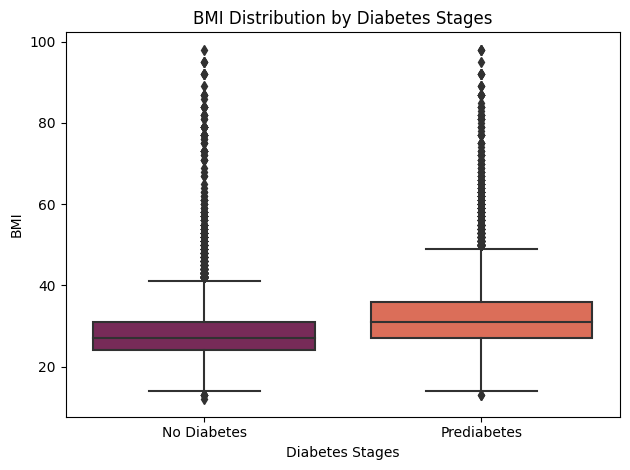

In [26]:
# Boxplot
sns.boxplot(data=df, x="Diabetes_binary", y="BMI", palette='rocket')
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("BMI")
plt.title("BMI Distribution by Diabetes Stages")
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])

# Save the figure
save_fig("BMI Distribution with Diabetes")
# Show the plot
plt.show()

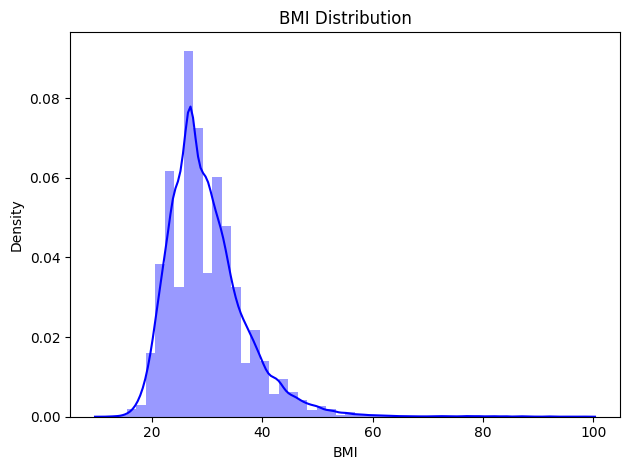

In [27]:
# BMI Distribution using distplot
sns.distplot(df['BMI'], hist=True, kde=True, color='b')

# Set plot labels
plt.title("BMI Distribution")
# Save the figure
save_fig("BMI Distribution")
# Show the plot
plt.show()

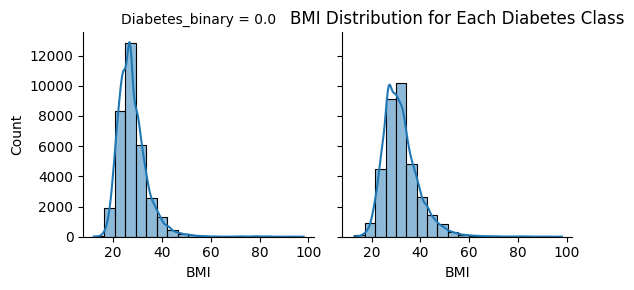

In [28]:
# Create a FacetGrid with separate histograms for each diabetes class
#FacetGrid is aMulti-plot grid for plotting conditional relationships
g = sns.FacetGrid(data=df, col='Diabetes_binary')
g.map(sns.histplot, 'BMI', bins=20, kde=True)

# Set plot labels
plt.title("BMI Distribution for Each Diabetes Class")
# Save the figure
save_fig("BMI Distribution each class")
# Show the plot
plt.show()

#### Relationship Between Diabetes and Smoker

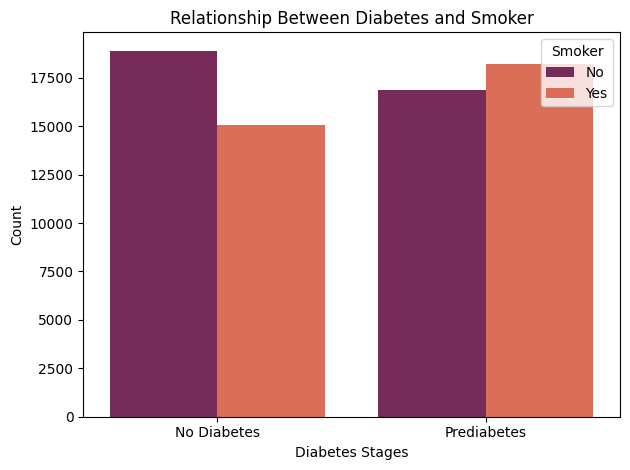

In [29]:
# Create a countplot
sns.countplot(data=df, x="Diabetes_binary", hue="Smoker", palette="rocket")
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("Count")
plt.title("Relationship Between Diabetes and Smoker")
plt.legend(title="Smoker", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])

# Save the figure
save_fig("Diabetes and Smoker")
# Show the plot
plt.show()

#### Relationship Between Diabetes and Heart Disease

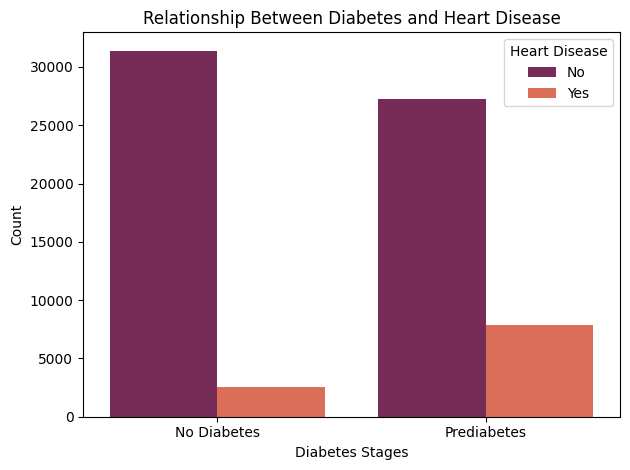

In [30]:
# Create a countplot
sns.countplot(data=df, x="Diabetes_binary", hue="HeartDiseaseorAttack", palette="rocket")
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("Count")
plt.title("Relationship Between Diabetes and Heart Disease")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])

# Save the figure
save_fig("Diabetes and Heart Disease")
# Show the plot
plt.show()

#### Relationship Between Diabetes and Physical Activity

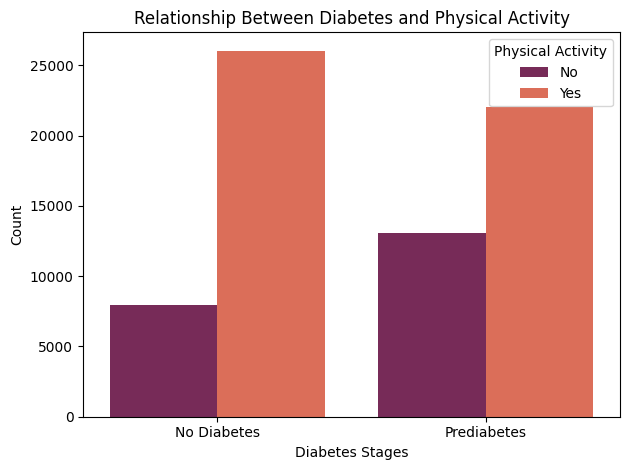

In [31]:
# Create a countplot
sns.countplot(data=df, x="Diabetes_binary", hue="PhysActivity", palette="rocket")
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("Count")
plt.title("Relationship Between Diabetes and Physical Activity")
plt.legend(title="Physical Activity", labels=["No", "Yes"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])

# Save the figure
save_fig("Diabetes and Physical Activity")
# Show the plot
plt.show()

#### Relationship Between Diabetes and Gender

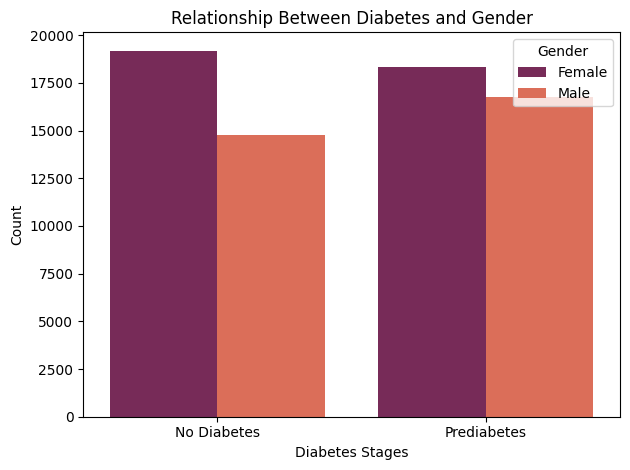

In [32]:
# Create a countplot
sns.countplot(data=df, x="Diabetes_binary", hue="Sex", palette="rocket")
# Set plot labels
plt.xlabel("Diabetes Stages")
plt.ylabel("Count")
plt.title("Relationship Between Diabetes and Gender")
# 0 = female 1 = male
plt.legend(title="Gender", labels=["Female", "Male"])
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Prediabetes'])

# Save the figure
save_fig("Diabetes and Gender")
# Show the plot
plt.show()